In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('Ironhack\data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')
df = df.drop_duplicates()
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [42]:
list(df.columns)

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [43]:
df.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [44]:
df.isnull().sum()

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

### I will create a smaller df with player performance data, personal and contractual info

In [45]:
cols_to_use = ['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club','POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth','Value',
 'Wage',
 'Release Clause',
 'Contract']
df1 = pd.read_csv('Ironhack\data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv',usecols =cols_to_use)
df1

,ID,Name,Age,OVA,Nationality,Club,POT,Team & Contract,Height,Weight,foot,Growth,Value,Wage,Release Clause,Contract
0,2,G. Pasquale,33,69,Italy,Udinese,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,€625K,€7K,€0,2008 ~ 2016
1,16,Luis García,37,71,Spain,KAS Eupen,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,€600K,€7K,€1.1M,2014 ~ 2019
2,27,J. Cole,33,71,England,Coventry City,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,€1.1M,€15K,€0,2016 ~ 2020
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,Sunderland 2009,"5'11""",165lbs,Right,14,€0,€0,€0,2009
4,41,Iniesta,36,81,Spain,Vissel Kobe,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,€5.5M,€12K,€7.2M,2018 ~ 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,€550K,€2K,€0,"Jun 30, 2021 On Loan"
17121,259090,W. Rickard,18,56,Wales,Burnley,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,10,€130K,€3K,€273K,2020 ~ 2021
17122,259091,C. Barrett,18,56,England,Burnley,67,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,11,€130K,€2K,€273K,2020 ~ 2022
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,73,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,11,€475K,€3K,€784K,2020 ~ 2023


In [46]:
cols = [col_name.lower().replace(' ', '_') for col_name in df1.columns]
df1.columns = cols
df1

,id,name,age,ova,nationality,club,pot,team_&_contract,height,weight,foot,growth,value,wage,release_clause,contract
0,2,G. Pasquale,33,69,Italy,Udinese,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,€625K,€7K,€0,2008 ~ 2016
1,16,Luis García,37,71,Spain,KAS Eupen,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,€600K,€7K,€1.1M,2014 ~ 2019
2,27,J. Cole,33,71,England,Coventry City,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,€1.1M,€15K,€0,2016 ~ 2020
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,Sunderland 2009,"5'11""",165lbs,Right,14,€0,€0,€0,2009
4,41,Iniesta,36,81,Spain,Vissel Kobe,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,€5.5M,€12K,€7.2M,2018 ~ 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,€550K,€2K,€0,"Jun 30, 2021 On Loan"
17121,259090,W. Rickard,18,56,Wales,Burnley,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,10,€130K,€3K,€273K,2020 ~ 2021
17122,259091,C. Barrett,18,56,England,Burnley,67,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,11,€130K,€2K,€273K,2020 ~ 2022
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,73,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,11,€475K,€3K,€784K,2020 ~ 2023


In [47]:
df1.dtypes

id                  int64
name               object
age                 int64
ova                 int64
nationality        object
club               object
pot                 int64
team_&_contract    object
height             object
weight             object
foot               object
growth              int64
value              object
wage               object
release_clause     object
contract           object
dtype: object

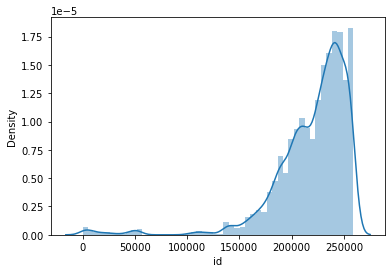

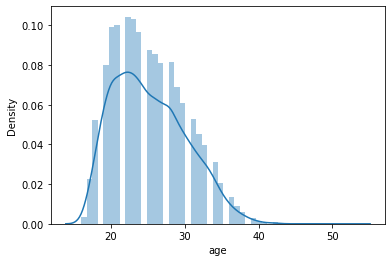

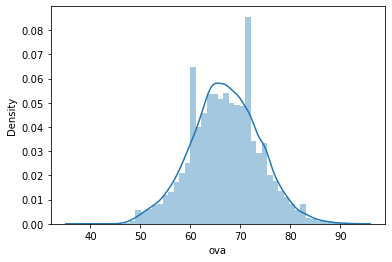

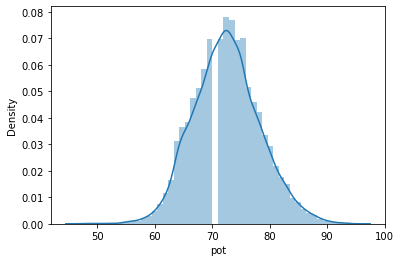

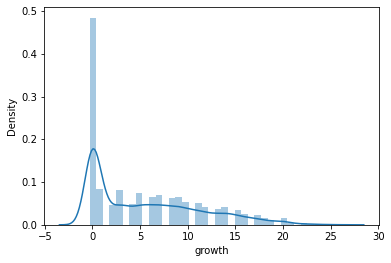

In [48]:
numerical = df1.select_dtypes(include=np.number)

for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()

In [49]:
df1.corr()

,id,age,ova,pot,growth
id,1.000000,-0.743844,-0.431079,0.042604,0.553757
age,-0.743844,1.000000,0.517099,-0.237619,-0.850204
ova,-0.431079,0.517099,1.000000,0.592268,-0.595585
pot,0.042604,-0.237619,0.592268,1.000000,0.294499
growth,0.553757,-0.850204,-0.595585,0.294499,1.000000


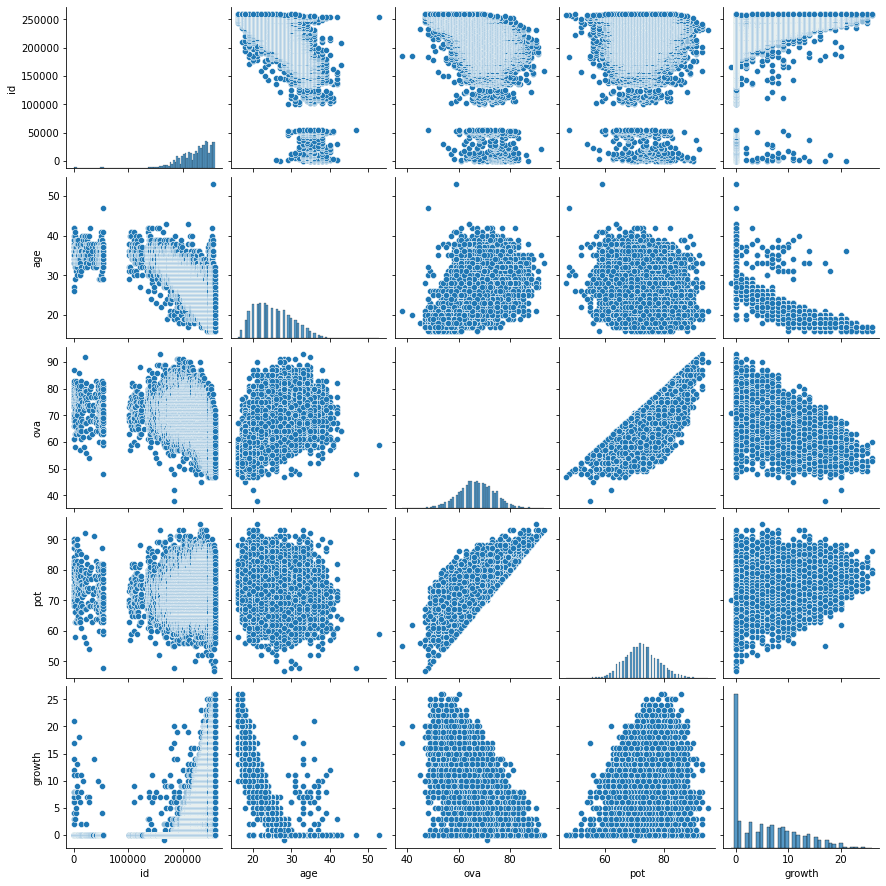

In [50]:
sns.pairplot(df1)

### Now I know OVA is correlated with age,pot and growth and I want to see if there are other variables good correlated as well with OVA

<AxesSubplot:>

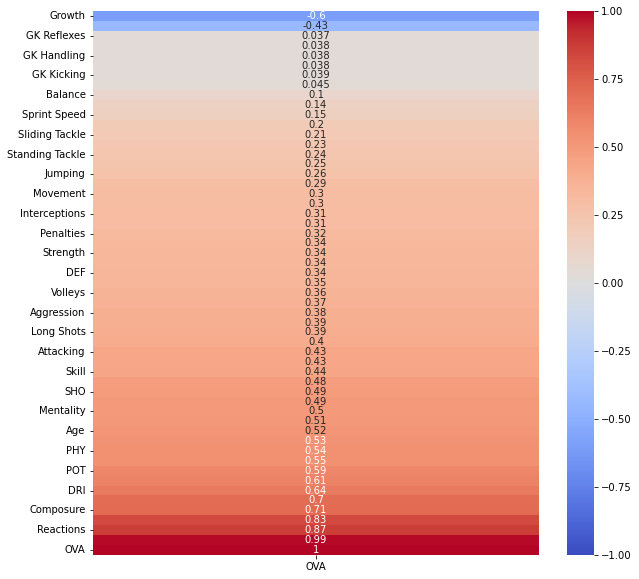

In [51]:
fig, ax = plt.subplots(figsize=(10,10))


upp_mat = np.triu(df.corr())

sns.heatmap(df.corr()[['OVA']].sort_values('OVA'), ax=ax, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

### I want to predict OVA based on age, growth and pot because I can see that they are correlated

In [53]:
df2=pd.get_dummies(df1)

X=df2.drop('ova',axis=1)
y=df2['ova']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression() # y = ai*xi + aii* xii + b
model.fit(X_train,y_train)

predictions  = model.predict(X_test)

r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.9999999991847149, 0.00019546049743495467, 3.820480605751992e-08)

In [58]:
df1['col_sum'] = df1.apply(lambda row: row.growth + row.ova, axis=1) # pot = growth + ova?
df1['col_sub'] = df1.apply(lambda row: row.pot - row.col_sum, axis=1)
(df1['col_sub'] == 0).sum() ## to see if I have 0 in all rows for df1

17125

### I want to predict OVA based on age and pot.
### Also I will set "id" as an index

In [59]:
cols_to_use = ['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club','POT',
 'Team & Contract',
 'Height',
 'foot','Value',
 'Wage',
 'Release Clause',
 'Contract']
df2 = pd.read_csv('Ironhack\data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv',usecols =cols_to_use)

In [60]:
cols = [col_name.lower().replace(' ', '_') for col_name in df2.columns]
df2.columns = cols

In [61]:
df2=df2.set_index('id')
df2

,name,age,ova,nationality,club,pot,team_&_contract,height,foot,value,wage,release_clause,contract
id,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,69,Udinese 2008 ~ 2016,"6'0""",Left,€625K,€7K,€0,2008 ~ 2016
16,Luis García,37,71,Spain,KAS Eupen,71,KAS Eupen 2014 ~ 2019,"5'10""",Right,€600K,€7K,€1.1M,2014 ~ 2019
27,J. Cole,33,71,England,Coventry City,71,Coventry City 2016 ~ 2020,"5'9""",Right,€1.1M,€15K,€0,2016 ~ 2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,82,Sunderland 2009,"5'11""",Right,€0,€0,€0,2009
41,Iniesta,36,81,Spain,Vissel Kobe,81,Vissel Kobe 2018 ~ 2021,"5'7""",Right,€5.5M,€12K,€7.2M,2018 ~ 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",Right,€550K,€2K,€0,"Jun 30, 2021 On Loan"
259090,W. Rickard,18,56,Wales,Burnley,66,Burnley 2020 ~ 2021,"5'10""",Right,€130K,€3K,€273K,2020 ~ 2021
259091,C. Barrett,18,56,England,Burnley,67,Burnley 2020 ~ 2022,"5'9""",Right,€130K,€2K,€273K,2020 ~ 2022


In [62]:
df2.corr()

,age,ova,pot
age,1.000000,0.517099,-0.237619
ova,0.517099,1.000000,0.592268
pot,-0.237619,0.592268,1.000000


In [28]:
df3=pd.get_dummies(df2)

X=df3.drop('ova',axis=1)
y=df3['ova']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression() # y = ai*xi + aii* xii + b
model.fit(X_train,y_train)

predictions  = model.predict(X_test)

r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.954616000531575, 1.458329396571198, 2.1267246289037147)

### Improving my model

In [63]:
log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

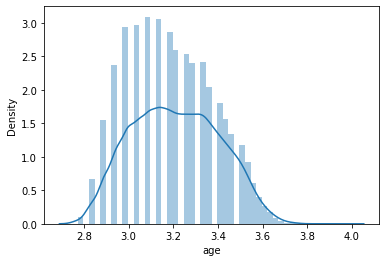

In [65]:
df2['age'] = df2['age'].apply(log_lmbda)

df2['age'] = df2['age'].fillna(np.mean(df2['age']))

sns.distplot(df2['age'])
plt.show()

In [67]:
df3=pd.get_dummies(df2)

X=df3.drop('ova',axis=1)
y=df3['ova']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression() # y = ai*xi + aii* xii + b
model.fit(X_train,y_train)

predictions  = model.predict(X_test)

r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.9573868196413454, 1.4131108196359443, 1.9968821885721706)